In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib in line

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
UsageError: unrecognized arguments: line


In [53]:
train_genba = pd.read_csv("./train_genba.tsv",delimiter='\t')
train_goto = pd.read_csv("./train_goto.tsv",delimiter='\t')
test_genba = pd.read_csv('./test_genba.tsv',delimiter='\t')
test_goto = pd.read_csv('./test_goto.tsv',delimiter='\t')

In [54]:
train_genba.shape,train_goto.shape,test_genba.shape,test_goto.shape

((2781, 140), (6461, 19), (1855, 140), (4273, 18))

In [55]:
train = pd.merge(train_goto,train_genba)
test  = pd.merge(test_goto,test_genba)


In [56]:
train.to_csv('train.tsv',sep='\t')
test.to_csv('test.tsv',sep='\t')

In [117]:
train = pd.read_csv('./train.tsv',sep='\t')
test = pd.read_csv('./test.tsv',sep='\t')

/home/anchen/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/anchen/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (101,102,106,107,110,112,122,128,129,135,136,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
train.head()

,Unnamed: 0,id,pj_no,keiyaku_pr,tc_mseki,tt_mseki,levelplan,fukuin,road_st,magutchi,...,bas_toho1,eki_kyori1,bastei_nm1,teiho1,rosen_nm2,eki_nm2,bas_toho2,eki_kyori2,bastei_nm2,teiho2
0,0,train_0000,0,39800000,109.26,104.43,2F/4LDK,4.0,問題なし,9.9,...,徒歩,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_0001,1,22300000,136.11,105.16,2F/4LDK,4.2,問題なし,9.3,...,徒歩,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_0002,2,19800000,87.07,85.94,2F/4LDK,4.0,問題なし,11.1,...,徒歩,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_0003,3,33990000,163.75,105.98,2F/4LDK,4.0,問題なし,10.5,...,徒歩,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,train_0004,4,30800000,111.51,89.01,2F/4LDK,4.0,問題なし,13.5,...,徒歩,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461 entries, 0 to 6460
Columns: 159 entries, Unnamed: 0 to teiho2
dtypes: float64(42), int64(14), object(103)
memory usage: 7.8+ MB


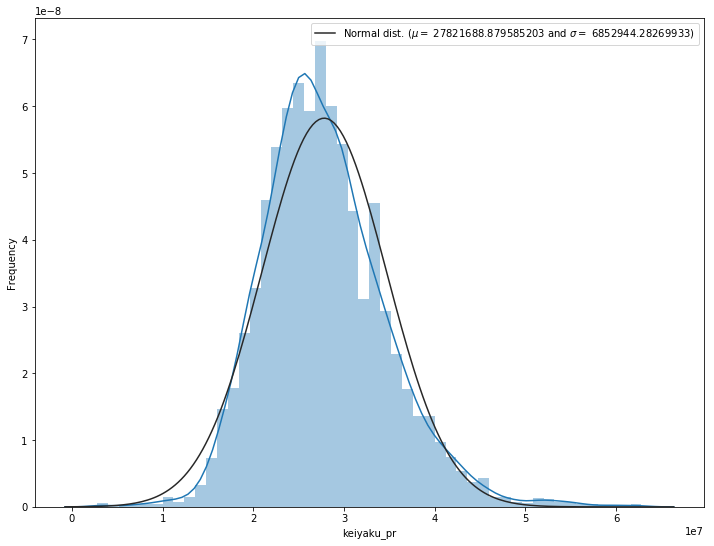

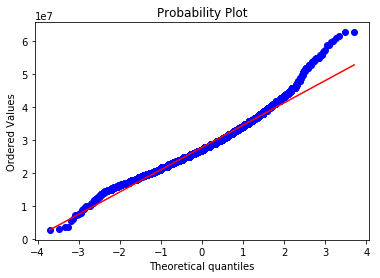

In [60]:
plt.subplots(figsize=(12,9))
sns.distplot(train_goto['keiyaku_pr'],fit=stats.norm)
(mu,sigma) = stats.norm.fit(train_goto['keiyaku_pr'])
plt.legend(['Normal dist. ($\mu=$ {} and $\sigma=$ {})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
fig = plt.figure()
stats.probplot(train_goto['keiyaku_pr'],plot = plt)
plt.show()

In [61]:
train.columns[train.isnull().any()]

Index(['levelplan', 'fukuin', 'road_st', 'magutchi', 'setsudo_hi',
       'setsudo_kj', 'jigata', 'hiatari', 'kobetsu1', 'kobetsu2',
       ...
       'rs_n_m_nashi', 'rs_n_tahata', 'bastei_nm1', 'teiho1', 'rosen_nm2',
       'eki_nm2', 'bas_toho2', 'eki_kyori2', 'bastei_nm2', 'teiho2'],
      dtype='object', length=102)

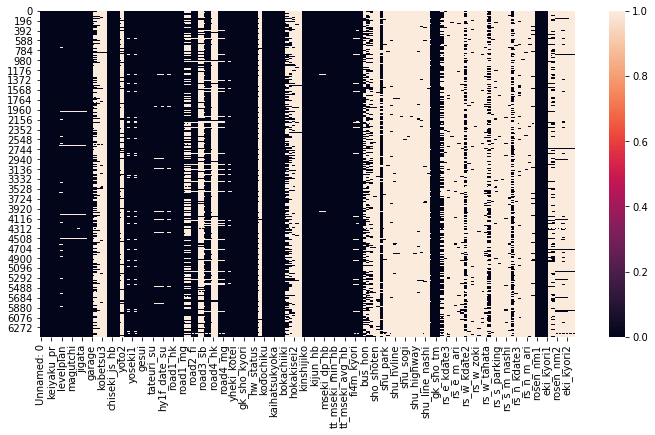

In [62]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull())
plt.show()

In [63]:
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace = True,ascending = False)
Isnull

shu_sogi           99.953568
rs_n_m_ari         99.644018
shu_highway        99.613063
shu_tower          99.613063
rs_w_m_ari         99.489243
hokakisei4         99.442811
shu_bochi          99.349946
shu_soon           99.257081
kobetsu4           99.241603
rs_w_zoki          99.226126
shu_kokyo          99.210649
rs_s_m_ari         99.179694
rs_n_zoki          99.102306
rs_e_m_ari         99.086829
rs_w_kdate3        99.086829
toshikuiki2        98.963009
shu_hvline         98.963009
shu_shop           98.932054
rs_n_kdate3        98.823711
rs_e_zoki          98.823711
rs_e_kdate3        98.699892
shu_zoki           98.668937
shu_line_ari       98.653459
shu_line_nashi     98.637982
teiho2             98.607027
bastei_nm2         98.607027
rs_s_zoki          98.452252
rs_s_kdate3        98.065315
shu_factory        97.848630
rs_n_m_nashi       97.848630
                     ...    
shu_jutaku         11.685498
kempei2             8.419749
yoseki2             8.419749
road4_mg      

In [64]:
train_corr = train.select_dtypes(include=[np.number])
train_corr.shape
                            

(6461, 56)

In [65]:
del train_corr['pj_no']

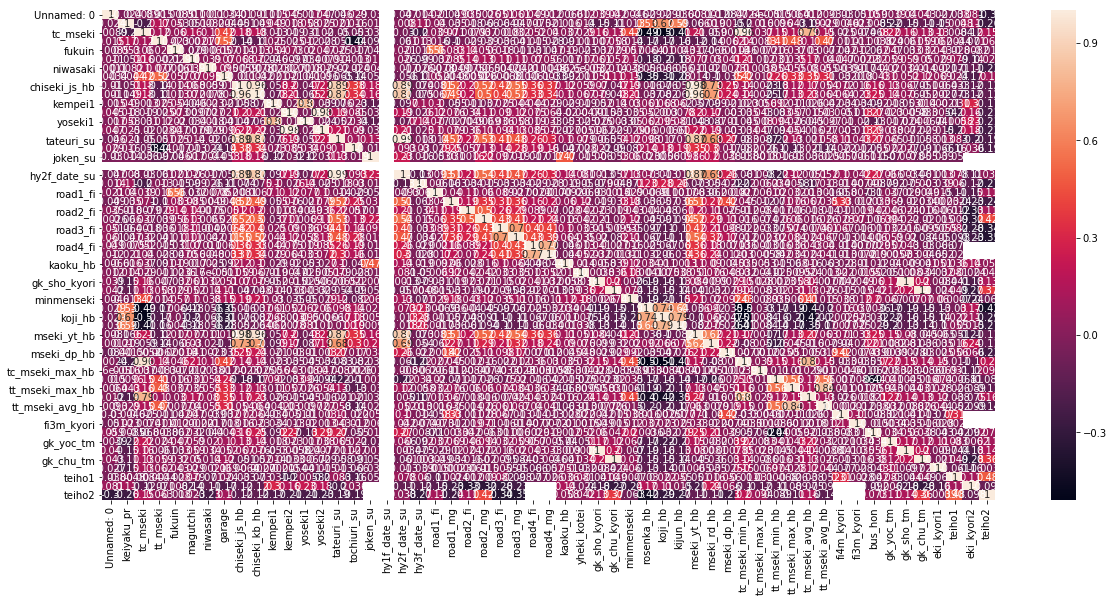

In [66]:
corr = train_corr.corr()
plt.subplots(figsize = (20,9))
sns.heatmap(corr,annot=True)

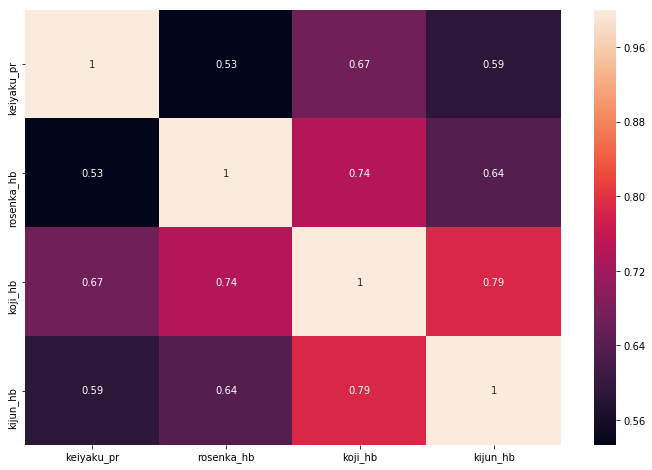

In [67]:
top_feature = corr.index[abs(corr['keiyaku_pr']>0.5)]
plt.subplots(figsize=(12,8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr,annot=True)
plt.show()

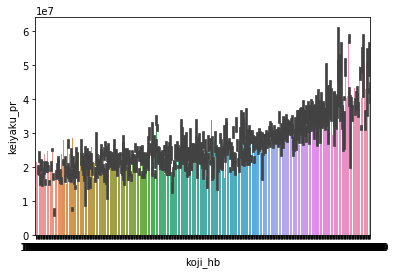

In [68]:
sns.barplot(train.koji_hb,train.keiyaku_pr)


In [44]:
for col in Isnull[Isnull>50].index:
    train[col] = train[col].fillna('None')

In [52]:
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace = True,ascending = False)
len(Isnull)

24

In [50]:
# string label to categorical values
from sklearn.preprocessing import LabelEncoder

for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values))
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))

In [51]:
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace = True,ascending = False)
len(Isnull)

24

/home/anchen/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


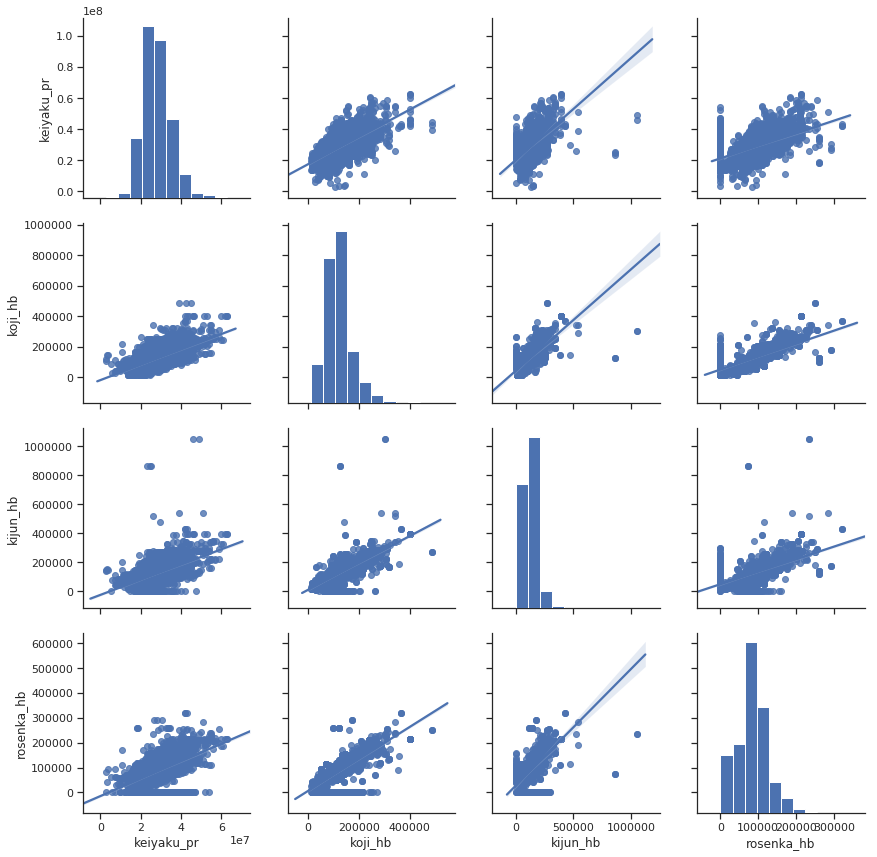

In [78]:
col = ['keiyaku_pr','koji_hb','kijun_hb','rosenka_hb']
sns.set(style='ticks')
sns.pairplot(train[col],size=3,kind='reg')

In [79]:
'''
delKeyWords = ['jukyo']
for col in delKeyWords:
    del train[col]
    del test[col]
'''

"\ndelKeyWords = ['jukyo']\nfor col in delKeyWords:\n    del train[col]\n    del test[col]\n"

In [83]:
for col in Isnull[Isnull>40].index:
    train[col] = train[col].fillna('None')

In [84]:
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace = True,ascending = False)
Isnull

shu_jutaku         11.685498
kempei2             8.419749
yoseki2             8.419749
road4_fi            8.373317
road4_mg            8.373317
road3_fi            7.676830
road3_mg            7.676830
fi3m_kyori          5.556415
levelplan           5.494505
fi4m_kyori          5.107568
road2_mg            3.884848
road2_fi            3.884848
hy1f_date_su        3.853893
tochiuri_su         3.761028
joken_su            3.513388
kaoku_hb            2.987154
hy3f_date_su        2.894289
setsudo_kj          1.485838
hiatari             1.470361
jigata              1.470361
setsudo_hi          1.470361
magutchi            1.454883
road_st             1.454883
fukuin              1.454883
mseki_dp_hb         0.479802
mseki_rd_hb         0.448847
chiseki_kb_hb       0.077387
hy2f_date_su        0.046432
tateuri_su          0.015477
tt_mseki_avg_hb     0.015477
dtype: float64

In [99]:
alist = Isnull.index

In [101]:
import copy
subtrain = copy.deepcopy(train)


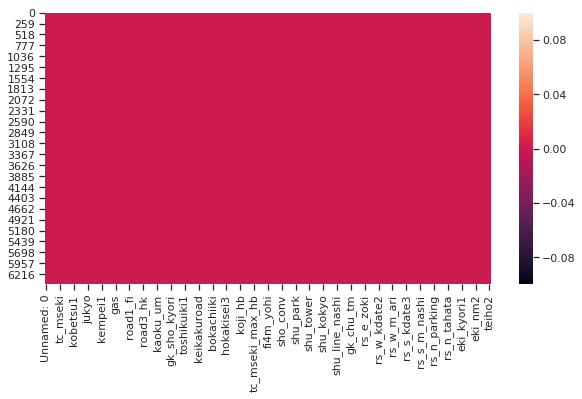

In [102]:
for each in alist:
    del subtrain[each]

plt.figure(figsize=(10,5))
sns.heatmap(subtrain.isnull())

In [103]:
# string label to categorical values
from sklearn.preprocessing import LabelEncoder

for i in range(subtrain.shape[1]):
    if subtrain.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(subtrain.iloc[:,i].values))
        subtrain.iloc[:,i] = lbl.transform(list(subtrain.iloc[:,i].values))
        #test.iloc[:,i] = lbl.transform(list(test.iloc[:,i].values))

In [85]:
subtrain = train[['keiyaku_pr','koji_hb','kijun_hb','rosenka_hb']]

In [104]:
y = subtrain['keiyaku_pr']
del subtrain['keiyaku_pr']

In [105]:
X= subtrain.values
y = y.values

In [123]:
validate = test[subtrain.columns]

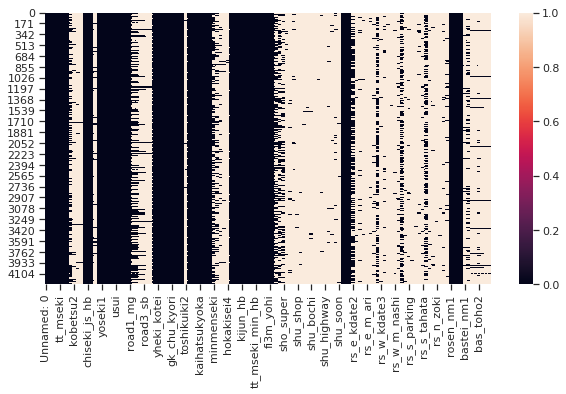

In [126]:
plt.figure(figsize=(10,5))
sns.heatmap(validate.isnull())

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [107]:
# linear regression
from sklearn import linear_model
model = linear_model.LinearRegression()

In [108]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
print("Accuracy -->>>",model.score(X_test,y_test)*100)

Accuracy -->>> 64.86618777343416


In [110]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [111]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [112]:
print("Accuracy -->>>",model.score(X_test,y_test)*100)

Accuracy -->>> 81.3554537413454


In [113]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100,max_depth=4)

In [114]:
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [115]:
print("Accuracy -->>>",model.score(X_test,y_test)*100)

Accuracy -->>> 80.49101140836649
